In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import h5py
import numpy as np

import powerbox as pbox
import py21cmfast as p21c

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [ ]:
! ls /n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/bkg/LightCones

In [21]:
outputs_dir = "/n/holylabs/LABS/iaifi_lab/Users/yitians/dm21cm/outputs"

lc0_fn = f"{outputs_dir}/pwave/pwave-elec-iter-3/log10m9.000/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_1_r54321.h5"
lc1_fn = f"{outputs_dir}/pwave_cmp_20241014/log10m9.000/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_1_r54321.h5"
lc2_fn = f"{outputs_dir}/bkg/LightCones/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5"

# lc1_fn = f"{outputs_dir}/pwave/pwave-elec-iter-3/log10m9.000/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_1_r54321.h5"
# lc2_fn = f"{outputs_dir}/pwave/pwave-elec-iter-3/log10m9.000/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_2_r54321.h5"
# lc0_fn = f"{outputs_dir}/bkg/LightCones/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5"

In [25]:
with h5py.File(lc0_fn, 'r') as hf:
    lcfield0 = hf['lightcones']['brightness_temp'][()]
with h5py.File(lc1_fn, 'r') as hf:
    lcfield1 = hf['lightcones']['brightness_temp'][()]
with h5py.File(lc2_fn, 'r') as hf:
    lcfield2 = hf['lightcones']['brightness_temp'][()]
lc0 = p21c.LightCone.read(lc0_fn)
z_s = lc0.lightcone_redshifts

In [26]:
lcfield1 = (lcfield1 - lcfield2) * (1.11537090e-22/2.594853719252956e-21) + lcfield2

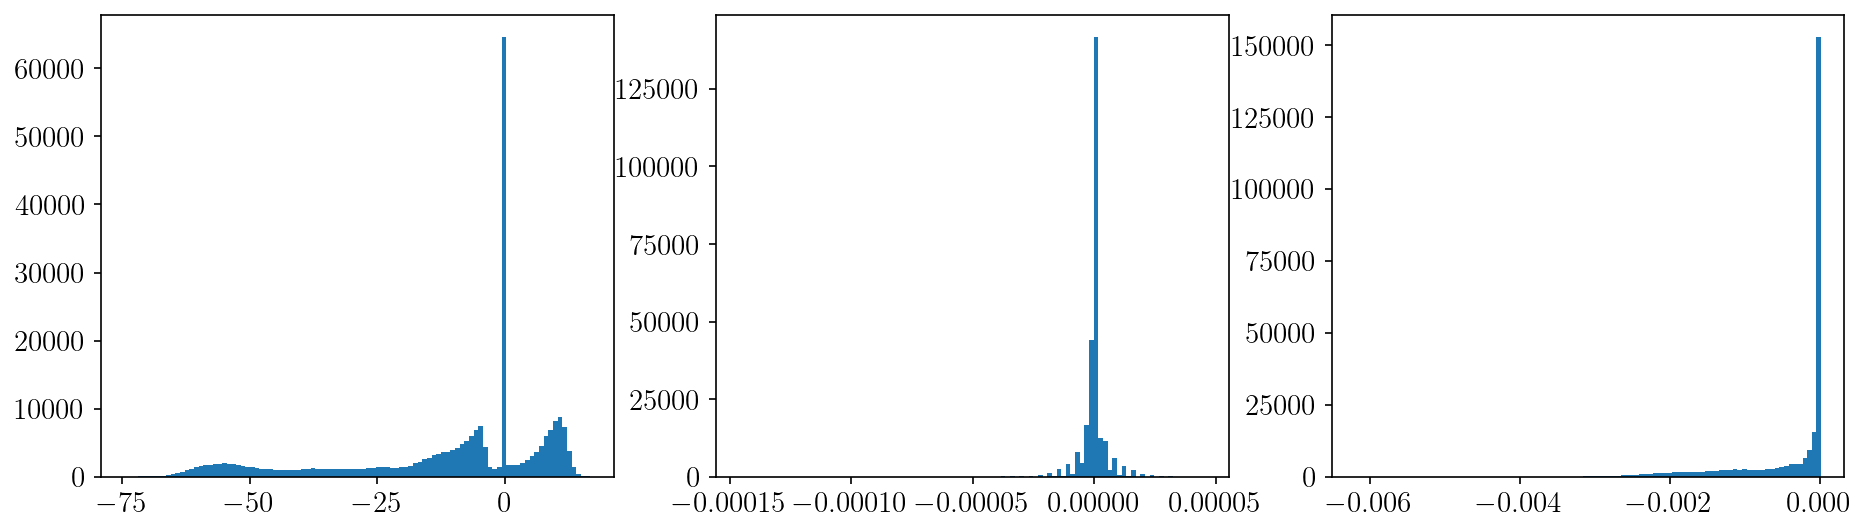

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist((lcfield0[:,0,:]).flatten(), bins=100);
axs[1].hist((lcfield1[:,0,:]-lcfield0[:,0,:]).flatten(), bins=100);
axs[2].hist((lcfield2[:,0,:]-lcfield0[:,0,:]).flatten(), bins=100);

In [12]:
EoR_color = mpl.colors.LinearSegmentedColormap.from_list('EoR', [
    (0.0,  'yellow'),
    (0.25, 'orange'),
    (0.5,  'red'),
    (0.75, 'black'),
    (0.85, 'blue'),
    (0.95, 'cyan'),
    (1.0,  'cyan')
])
vmin, vmax = -60, 20 # 0 at 0.75
EoR_color_small = mpl.colors.LinearSegmentedColormap.from_list('EoRsmall', [
    (0.0, 'black'),
    (0.6, 'blue'),
    (1.0, 'cyan')
])

In [18]:
np.min(-(lcplot_fid - lcplot_bkg))

-0.0061998367

/tmp/ipykernel_915743/1422861957.py:51: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.05, hspace=0.05)


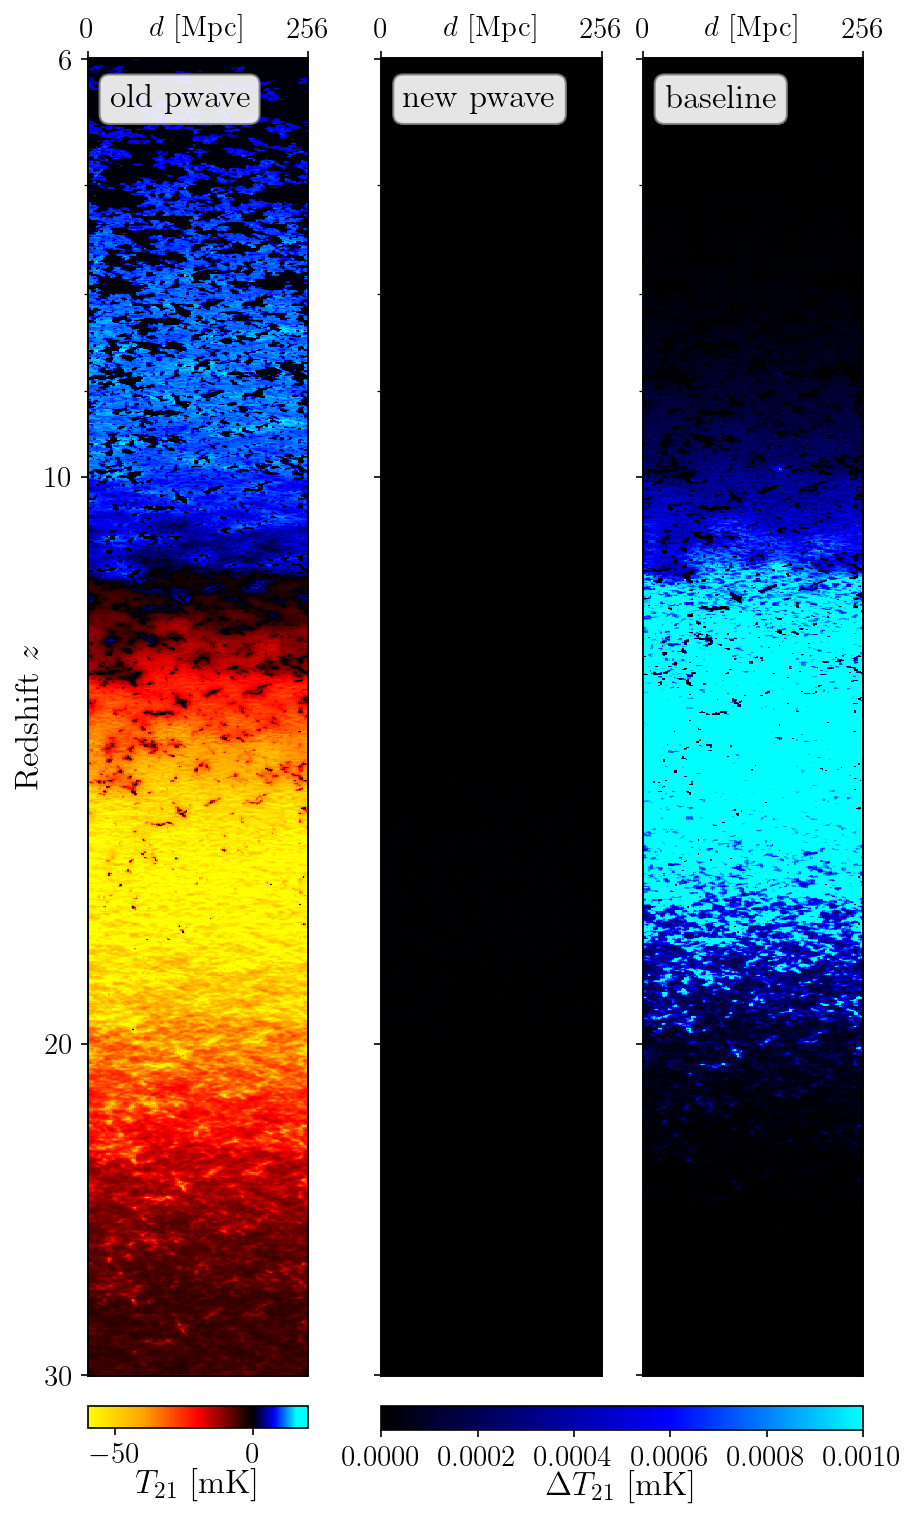

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(6, 10), sharey='row', layout='constrained')

x_s = np.linspace(0, 256, 128)
z_start = 6.
z_end = 30.
i_z_start = np.argmin(np.abs(z_s-z_start)) - 1
i_z_end = np.argmin(np.abs(z_s-z_end)) + 1
z_s_plot = z_s[i_z_start:i_z_end]
lcplot_bkg = lcfield0[:,0,i_z_start:i_z_end].T
lcplot_fid = lcfield1[:,0,i_z_start:i_z_end].T
lcplot_hom = lcfield2[:,0,i_z_start:i_z_end].T

ax = axs[0]
im = ax.pcolormesh(x_s, z_s_plot, lcplot_bkg, cmap=EoR_color, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(im, ax=ax, aspect=10, pad=0.01, orientation='horizontal')
cbar.ax.set_xlabel(r'$T_{21}$ [mK]', labelpad=0, fontsize=16)

ax = axs[1]
im = ax.pcolormesh(x_s, z_s_plot, (lcplot_fid - lcplot_bkg), cmap=EoR_color_small, vmin=0, vmax=0.001)

ax = axs[2]
im = ax.pcolormesh(x_s, z_s_plot, -(lcplot_hom - lcplot_bkg), cmap=EoR_color_small, vmin=0, vmax=0.001)
cbar = fig.colorbar(im, ax=axs[1:], aspect=20, pad=0.01, orientation='horizontal')
cbar.ax.set_xlabel(r'$\Delta T_{21}$ [mK]', labelpad=0, fontsize=16)

for ax in axs:
    ax.set(yscale='log', xticks=[])
    axt = ax.twiny()
    axt.set_xticks([0, 256])
    axt.set_xlabel(r'$d$ [Mpc]', labelpad=-9)
    ax.invert_yaxis()

# axs[0].set_title(r'No injection $T_b$ [mK]')
# axs[1].set_title(r'Inhom. injection $T_b-$ No injection $T_b$ [mK]')
# axs[2].set_title(r'Hom. injection $T_b-$ No injection $T_b$ [mK]')

axs[0].set_ylabel('Redshift $z$', labelpad=0, fontsize=16)
axs[0].yaxis.set_minor_formatter(mpl.ticker.NullFormatter())
axs[0].set_yticks([6, 10, 20, 30])
axs[0].set_yticklabels([6, 10, 20, 30])

bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

axs[0].text(0.1, 0.98, 'old pwave', fontsize=16,
            transform=axs[0].transAxes, ha='left', va='top', bbox=bbox_props)
axs[1].text(0.1, 0.98, 'new pwave', fontsize=16,
            transform=axs[1].transAxes, ha='left', va='top', bbox=bbox_props)
axs[2].text(0.1, 0.98, 'baseline', fontsize=16,
            transform=axs[2].transAxes, ha='left', va='top', bbox=bbox_props)

fig.subplots_adjust(wspace=0.05, hspace=0.05)
#fig.savefig("lightconeexample_delta.png", dpi=300)

In [25]:
np.max(lcplot_bkg - lcplot_fid)

0.0